# Classification

*Supervised* machine learning techniques involve training a model to operate on a set of *features* and predict a *label* using a dataset that includes some already-known label values. You can think of this function like this, in which ***y*** represents the label we want to predict and ***X*** represents the vector of features the model uses to predict it.

$$y = f([x_1, x_2, x_3, ...])$$


*Classification* is a form of supervised machine learning in which you train a model to use the features (the ***x*** values in our function) to predict a label (***y***) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. The simplest form of classification is *binary* classification, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False", "Internal" or "External", "Profitable" or "Non-Profitable", and so on.

## Binary and MultiCalss Classification

In this notebook, we'll focus on an example of *binary MultiCalss classification*, where the model must predict a label that belongs to one of two classes. We'll train a binary classifier to predict whether or not a patient should be tested for diabetes based on their medical data.

### Explore the data

Run the following cell to load a CSV file of patent data into a **Pandas** dataframe.

> **Citation**: The diabetes dataset used in this exercise is based on data originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Cleaning and preprocessing your dataset is an essential step before feeding it into machine learning models. Here are some common preprocessing steps you might consider:**

### ***Handling Missing Values:***
Identify and handle missing values (NaN, None, null, empty). Common strategies include:
Removing rows or columns with missing values.
Imputing missing values using the mean, median, or a more sophisticated method.
Using algorithms that handle missing values internally (e.g., tree-based models like decision trees or random forests).

### ***Handling Categorical Data:***
Encode categorical variables into a format suitable for machine learning models. Common techniques include:

*  **One-Hot Encoding:** Create binary columns for each category.
*  **Label Encoding:** Assign unique integers to different categories.
*  **Ordinal Encoding:** Encode ordinal variables with meaningful order.

### ***Scaling and Normalization:***
Standardize or normalize numerical features to a similar scale. This helps models that rely on distances or gradients, such as gradient descent:

*  **Min-Max Scaling:** Scale values to a range (e.g., [0, 1]).
*  **Standard Scaling:** Scale values to have a mean of 0 and standard deviation of 1.

### ***Handling Outliers:***
Identify and handle outliers, either by removing them or transforming them to be less influential.

### ***Feature Engineering:***
Create new features that might enhance the predictive power of your model.

### ***Splitting Data:***
Split your dataset into training and testing sets to evaluate the model's performance on unseen data.

## **multiclass logistic regression**
The code I provided for the multiclass logistic regression should work for datasets with more than two classes. However, there are a few considerations and potential adjustments you might want to make:

Number of Classes: If your dataset has more than two classes, the logistic regression model will automatically handle it using the "one-vs-rest" strategy (multi_class='ovr'), where separate binary classifiers are trained for each class against the rest.

Label Encoding: Ensure that your labels (the 'Diabetic' column in your case) are appropriately encoded with integers. The LabelEncoder can be used for this purpose. Make sure that the integer labels assigned by LabelEncoder represent the different classes accurately.

Model Configuration: The logistic regression model should be configured with multi_class='ovr'. This is the default for logistic regression, and you can explicitly set it to ensure clarity.

'ovr' (One-vs-Rest): This is the default strategy for binary classification.
For multiclass problems, it fits a separate binary classifier for each class,
treating that class as the positive class and the rest as the negative class.

'multinomial': This strategy is used for multiclass problems.
LogisticRegression(multi_class='multinomial', solver='lbfgs')
It fits a single classifier per class and optimizes the cross-entropy loss,
which is suitable for scenarios where you want to directly optimize the multiclass log-loss.

'auto': This strategy automatically selects between 'ovr' and 'multinomial' based on the nature of the problem.
LogisticRegression(multi_class='auto', solver='lbfgs')
'ovr' is used for binary classification, and 'multinomial' is used for multiclass problems.

The choice between 'ovr' and 'multinomial' depends on the nature of your problem and the optimization goals.
If you are unsure, using 'auto' can be a convenient option to let scikit-learn choose the appropriate strategy based on the problem at hand.

Additionally, the solver parameter influences the optimization algorithm used for the logistic regression model.
For example, 'lbfgs' is suitable for 'multinomial' problems, while 'liblinear' is a good choice for 'ovr' problems.


### To check whether the columns in your diabetes dataset need to be **standardized**, you can look at the scale of the features. Standardization is typically applied when the features have different scales. You can use a box plot to visualize the distribution of each column and see if their scales vary significantly.
### In the box plot, if you observe that the scales of the features are vastly different, it might be an indication that standardization is necessary. Standardization involves scaling the features to have a mean of 0 and a standard deviation of 1.

### In KDE Plot ,If the KDE plots show that the distributions of different columns have similar shapes and scales, then standardization may not be necessary.
### If you observe that the shapes and scales of the distributions vary significantly between columns, it could indicate that standardization might be beneficial.

### Whitout Vizualize ,Inspect the output to see if the ranges are similar or if there are large differences between columns. If you notice that the ranges vary significantly, it might be a good idea to standardize the columns.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Column Ranges:
Pregnancies                14.000000
PlasmaGlucose             148.000000
DiastolicBloodPressure     93.000000
TricepsThickness           86.000000
SerumInsulin              785.000000
BMI                        37.834116
DiabetesPedigree            2.223550
Age                        56.000000
dtype: float64 

Column Min*2: 4.447100787999999 

Column Max : 785.0 

The ranges vary significantly. Standardization might be beneficial.


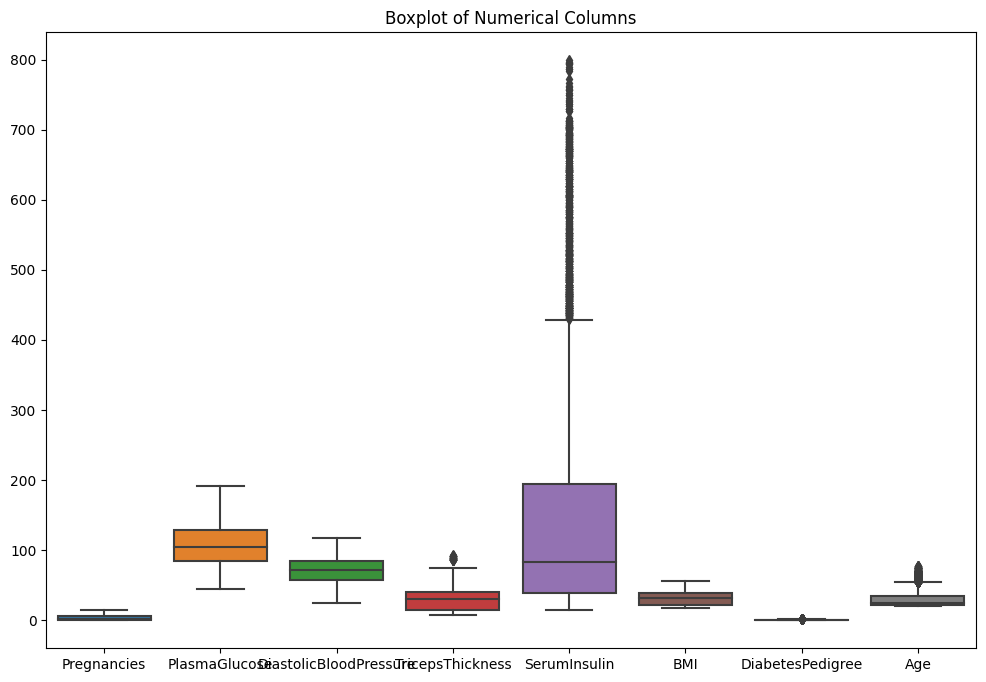

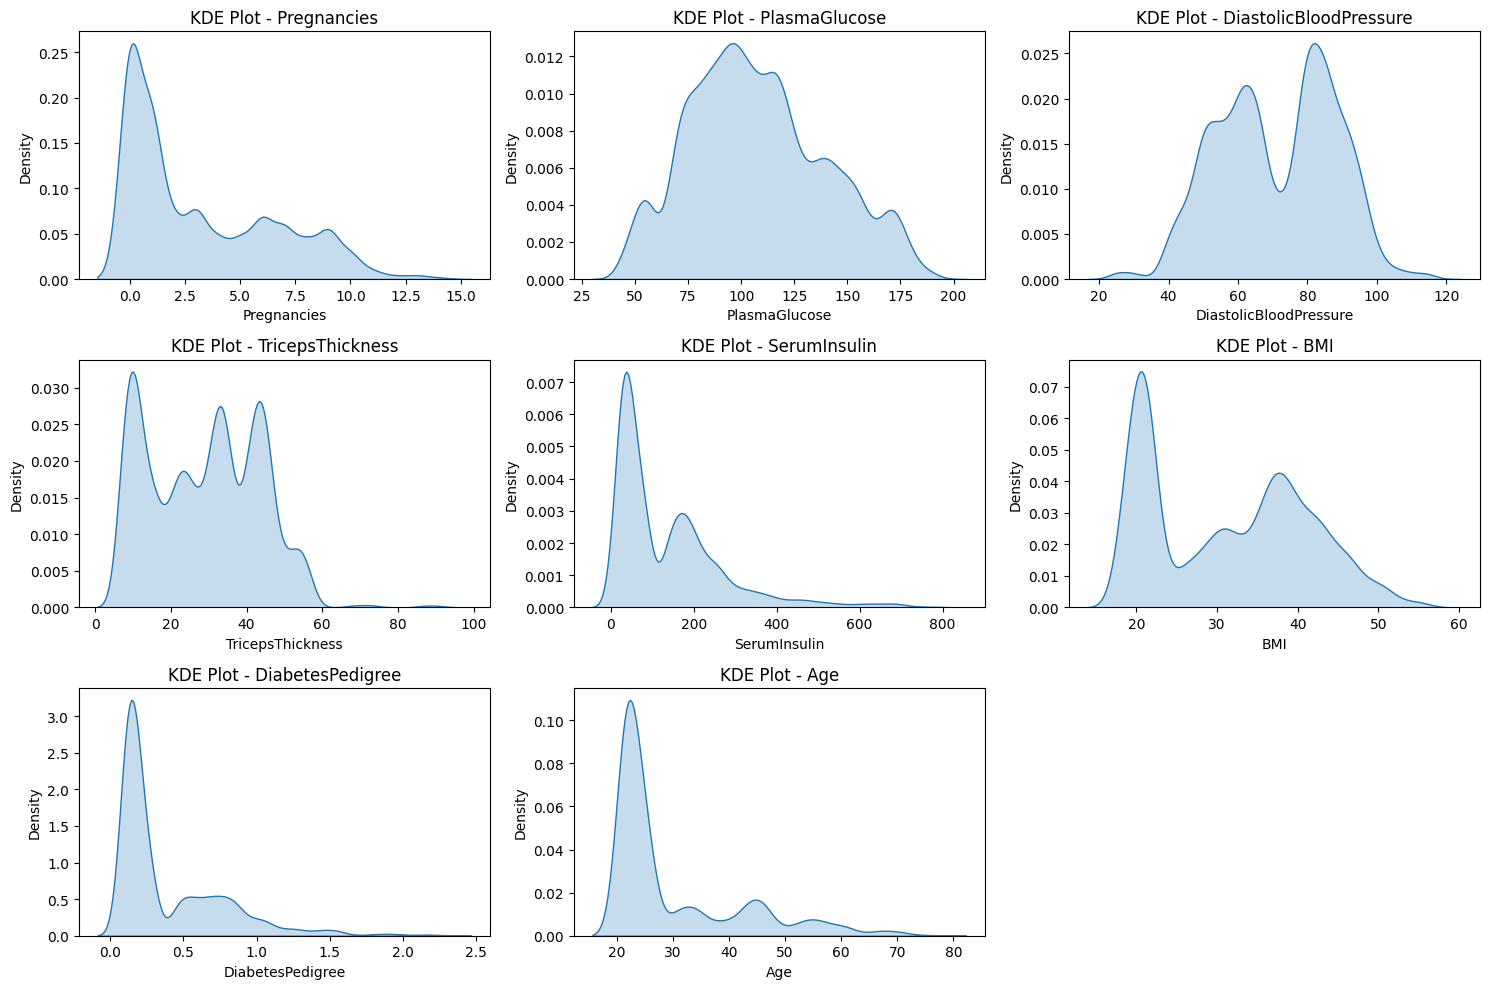

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/drive')

# Load the training dataset
diabetes = pd.read_csv('/content/drive/MyDrive/DataSets/diabetes-y01.csv')

# Select numerical columns for visualization
numerical_columns = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

# Display the range of each numerical column
column_ranges = diabetes[numerical_columns].max() - diabetes[numerical_columns].min()
print("Column Ranges:")
print(column_ranges,'\n')
print("Column Min*2:",2 * column_ranges.min(),'\n')
print("Column Max :",column_ranges.max(),'\n')

# Check if there are large differences in ranges
if column_ranges.max() > 2 * column_ranges.min():
    print("The ranges vary significantly. Standardization might be beneficial.")
else:
    print("The ranges are relatively consistent. Standardization may not be as critical.")

# Create a box plot for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=diabetes[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.show()

# Create KDE plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(diabetes[column], fill=True)
    plt.title(f'KDE Plot - {column}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from google.colab import drive

drive.mount('/content/drive')

# Load the training dataset
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv

#Numerical Dataset
diabetes = pd.read_csv('/content/drive/MyDrive/DataSets/diabetes-y01.csv')

#Catagirical Dataset
# diabetes = pd.read_csv('/content/drive/MyDrive/DataSets/diabetes-yCatagirical.csv')

# Separate features and labels
# First Features selection must be applied by:
#                                      Visual Inspection
#                                      Correlation Coefficients and p-values By pearsonr
#                                      Statistical hypothesis testing (ttest_1samp - ttest_ind - Mannwhitneyu )
#                                      Feature importance

features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = 'Diabetic'

# Convert categorical labels to numeric using LabelEncoder
label_encoder = LabelEncoder()

if diabetes[label].dtype == 'object':
  diabetes[label] = label_encoder.fit_transform(diabetes[label])

# Convert categorical features to numeric using LabelEncoder
for feature in features:
    if diabetes[feature].dtype == 'object':
        diabetes[feature] = label_encoder.fit_transform(diabetes[feature])

#Check dataset
print(diabetes.info())
print(diabetes.isna().sum()) #diabetes.isnull().sum()

diabetes.dropna(axis=0, how='any',inplace=True)# Removing Rows with Missing Values

#For numerical features, you can replace missing values with the mean, median, or another statistical measure.

# Imputing Missing Values
for feature in diabetes.columns:
    if diabetes[feature].dtype == 'float64' or diabetes[feature].dtype == 'int64':
        # Fill missing values for numeric features with mean
        diabetes[feature].fillna(diabetes[feature].mean(numeric_only=True), inplace=True)
    elif diabetes[feature].dtype == 'object':
        # Fill missing values for categorical features with mode
        diabetes[feature].fillna(diabetes[feature].mode()[0], inplace=True)

# Handling Missing Values in Labels:
diabetes.dropna(axis=0, how='any',subset=[label], inplace=True)
diabetes[label].fillna(diabetes[label].mean(), inplace=True)


# Scaling and Normalization ###############################

#When we can usage of NumPy arrays for using preprocessor.fit_transform
# numeric_features = [0, 1, 2, 3, 4, 5, 6, 7]  # Indices of numeric columns
# X, y = diabetes[features].values, diabetes[label].values
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features)
#     ])

#When we can usage of DataFrame for using preprocessor.fit_transform
# features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, features)
#     ])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,features)
    ])

X = diabetes[features]
y = diabetes[label]
# X, y = diabetes[features].values, diabetes[label].values

X_preprocessed = preprocessor.fit_transform(X)
############################################################

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.30, random_state=0)
# #OR Wecan Preprocess the features after Splitting data (for example, standardize them)
# scaler = StandardScaler()
# X_train_preprocessed = scaler.fit_transform(X_train)
# X_test_preprocessed = scaler.transform(X_test)
print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Snippet 1: Grid Search with Cross-Validation for Hyperparameter Tuning
# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Values of C from 0.001 to 1000 in a log scale
    'penalty': ['l1', 'l2'],      # Regularization types: l1 (Lasso) and l2 (Ridge)
}

# Create a logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')  # Specify 'ovr' for multiclass
# 'ovr' stands for one-vs-rest, and it's the default for logistic regression

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear', multi_class='ovr').fit(X_train, y_train)

# Predictions on the test set
predictions_test = best_logreg.predict(X_test)
print('Predicted labels on test set: ', predictions_test)
print('Actual labels on test set:    ', y_test)
print('Accuracy on test set: ', accuracy_score(y_test, predictions_test))

#--------------------------------------------------------------
# Use cross-validation to evaluate the model
# cross_val_scores = cross_val_score(logistic_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')

# Snippet 2: Cross-Validation without Hyperparameter Tuning
# Print cross-validation scores
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean Cross-Validation Score:", cross_val_scores.mean())


#--------------------------------------------------------------
#Manualy Input New Data To Perdict

# Generate new data for prediction (replace this with your actual new data)
new_data = np.array([[2, 120, 80, 25, 150, 25, 0.5, 30]])  # Example new data

# Make predictions on new data
new_predictions = best_logreg.predict(new_data)
print('Predicted label for new data: ', new_predictions)
#--------------------------------------------------------------


#--------------------------------------------------------------
#Feed New Data From CSV To Perdict

# Read new data from new_data.csv
new_data = pd.read_csv('/content/drive/MyDrive/DataSets/new_data_diabetes.csv')

# Make predictions on new data
new_data_predictions = best_logreg.predict(new_data[features])

# Inverse transform numeric predictions to get original labels
if diabetes[label].dtype == 'object':
  new_data['Diabetic'] = label_encoder.inverse_transform(new_data_predictions)
else:
  new_data['Diabetic'] = new_data_predictions

# Display the DataFrame with predictions
print(new_data)

# Write the DataFrame with predictions back to the CSV file
new_data.to_csv('new_data_perdicted_with_labled.csv', index=False)
#--------------------------------------------------------------


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None
PatientID                 0
Pregnancies               0
PlasmaGlucose  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## cross_val_score:
Purpose:

Evaluates a model's performance by computing a score (e.g., accuracy, precision, recall) for each fold in cross-validation.
Returns an array of scores, one for each fold.

Usage:

Typically used when you want to assess the overall performance of a model by obtaining a score for each fold.
Useful for comparing different models or model configurations.

## cross_val_predict:
Purpose:

Generates cross-validated predicted values for each data point in the input dataset.
Returns an array of predicted values.

Usage:

Typically used when you want the predicted values for each data point in a cross-validated manner.
Useful for examining how well the model predicts individual data points across different folds.

Differences:
Output:

cross_val_score returns an array of scores (performance metric values).
cross_val_predict returns an array of predicted values.
Use Cases:

Use cross_val_score when you want to evaluate and compare the overall performance of a model.
Use cross_val_predict when you want the predicted values for each data point in a cross-validated manner.
Metric:

cross_val_score requires specifying a scoring metric (e.g., accuracy, precision) to compute the scores.
cross_val_predict focuses on generating predicted values and does not require specifying a scoring metric.
Applications:

cross_val_score is commonly used in model evaluation and comparison scenarios.
cross_val_predict is commonly used when you want to analyze the model's predictions for individual data points in a cross-validated way.

# **Features selection**
**First Features selection must be applied by:**
*                                      Visual Inspection
*                                      Correlation Coefficients and p-values By pearsonr
*                                      Statistical hypothesis testing (ttest_1samp - ttest_ind - Mannwhitneyu )
*                                      Feature importance

Now let's compare the feature distributions for each label value.

In [ ]:
import pandas as pd
# load the training dataset
diabetes = pd.read_csv('/content/drive/MyDrive/DataSets/diabetes-y01.csv')
diabetes.head()

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

# for n in range(0,5):
#     print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

In [ ]:
# features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
# for i, feature in enumerate(features):
#     # Calculate the row index based on the position of the feature in the 'features' list
#     row_index = i // 4
#     print('i: {}',i)
#     print('Row_Index:// {}',row_index)
#     print('####')
#     # Boxplot - Row 0 and Row 2
#     print('boxplot row *2,column %4: ({},{})'.format(row_index * 2,i % 4))
#     print('***')
#     # KDE plot - Row 1 and Row 3
#     print('kdeplot row: ({},{})'.format(row_index * 2+1,i % 4))
#     print('-------------------------')


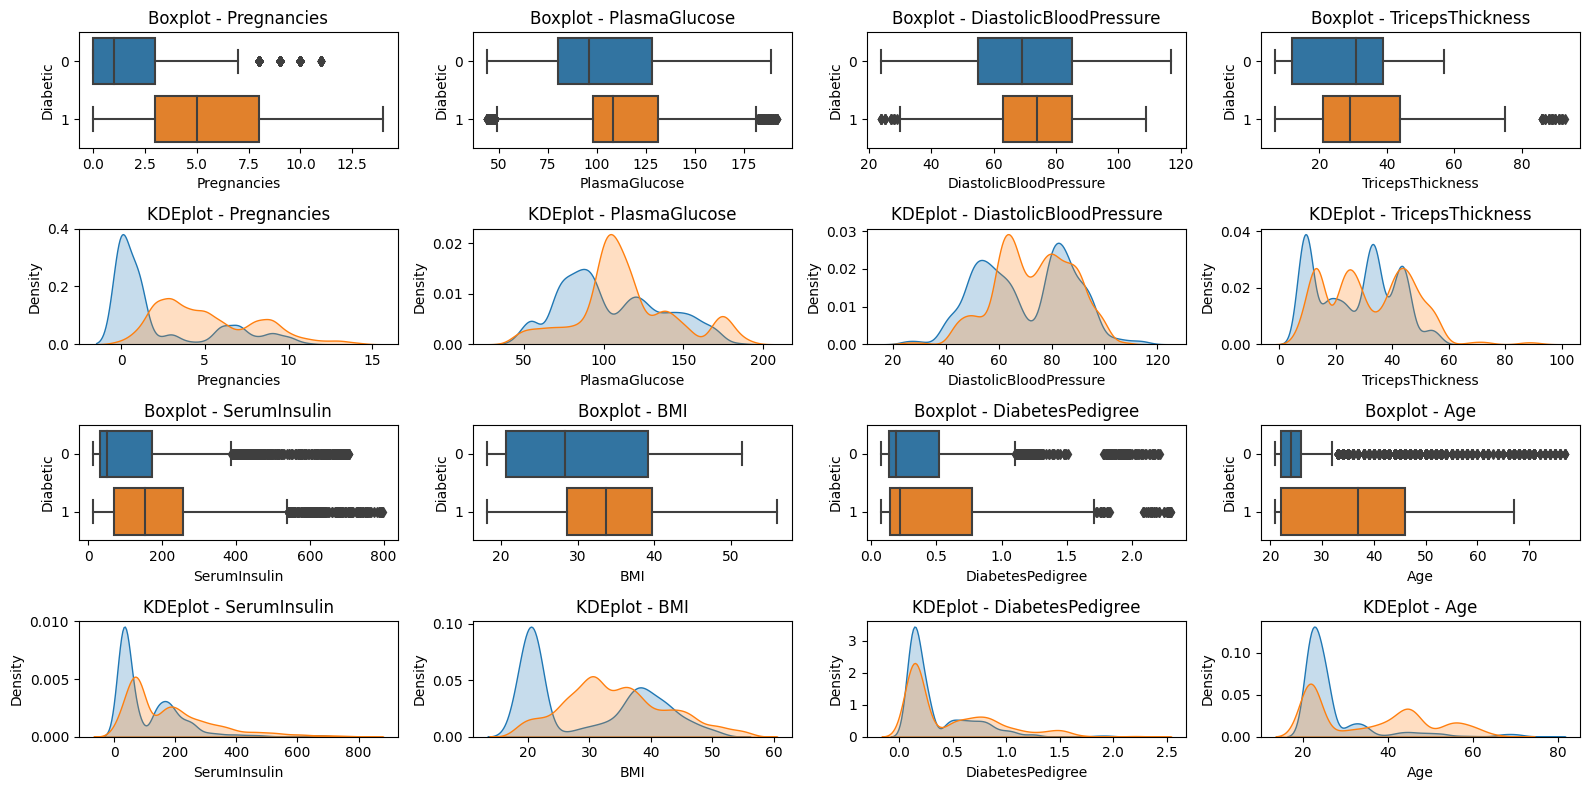

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame named 'diabetes'
# and 'Diabetic' column contains the labels (0 for non-diabetic, 1 for diabetic)

features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 8))

# Loop through features
for i, feature in enumerate(features):
    # Calculate the row index based on the position of the feature in the 'features' list
    row_index = i // 4

    # Boxplot - Row 0 and Row 2
    sns.boxplot(y='Diabetic', x=feature, data=diabetes, ax=axes[row_index * 2, i % 4], orient='h')
    axes[row_index * 2, i % 4].set_title(f'Boxplot - {feature}')

    # KDE plot - Row 1 and Row 3
    sns.kdeplot(diabetes[diabetes['Diabetic'] == 0][feature], fill=True, label='Non-Diabetic', ax=axes[row_index * 2 + 1, i % 4])
    sns.kdeplot(diabetes[diabetes['Diabetic'] == 1][feature], fill=True, label='Diabetic', ax=axes[row_index * 2 + 1, i % 4])
    axes[row_index * 2 + 1, i % 4].set_title(f'KDEplot - {feature}')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()


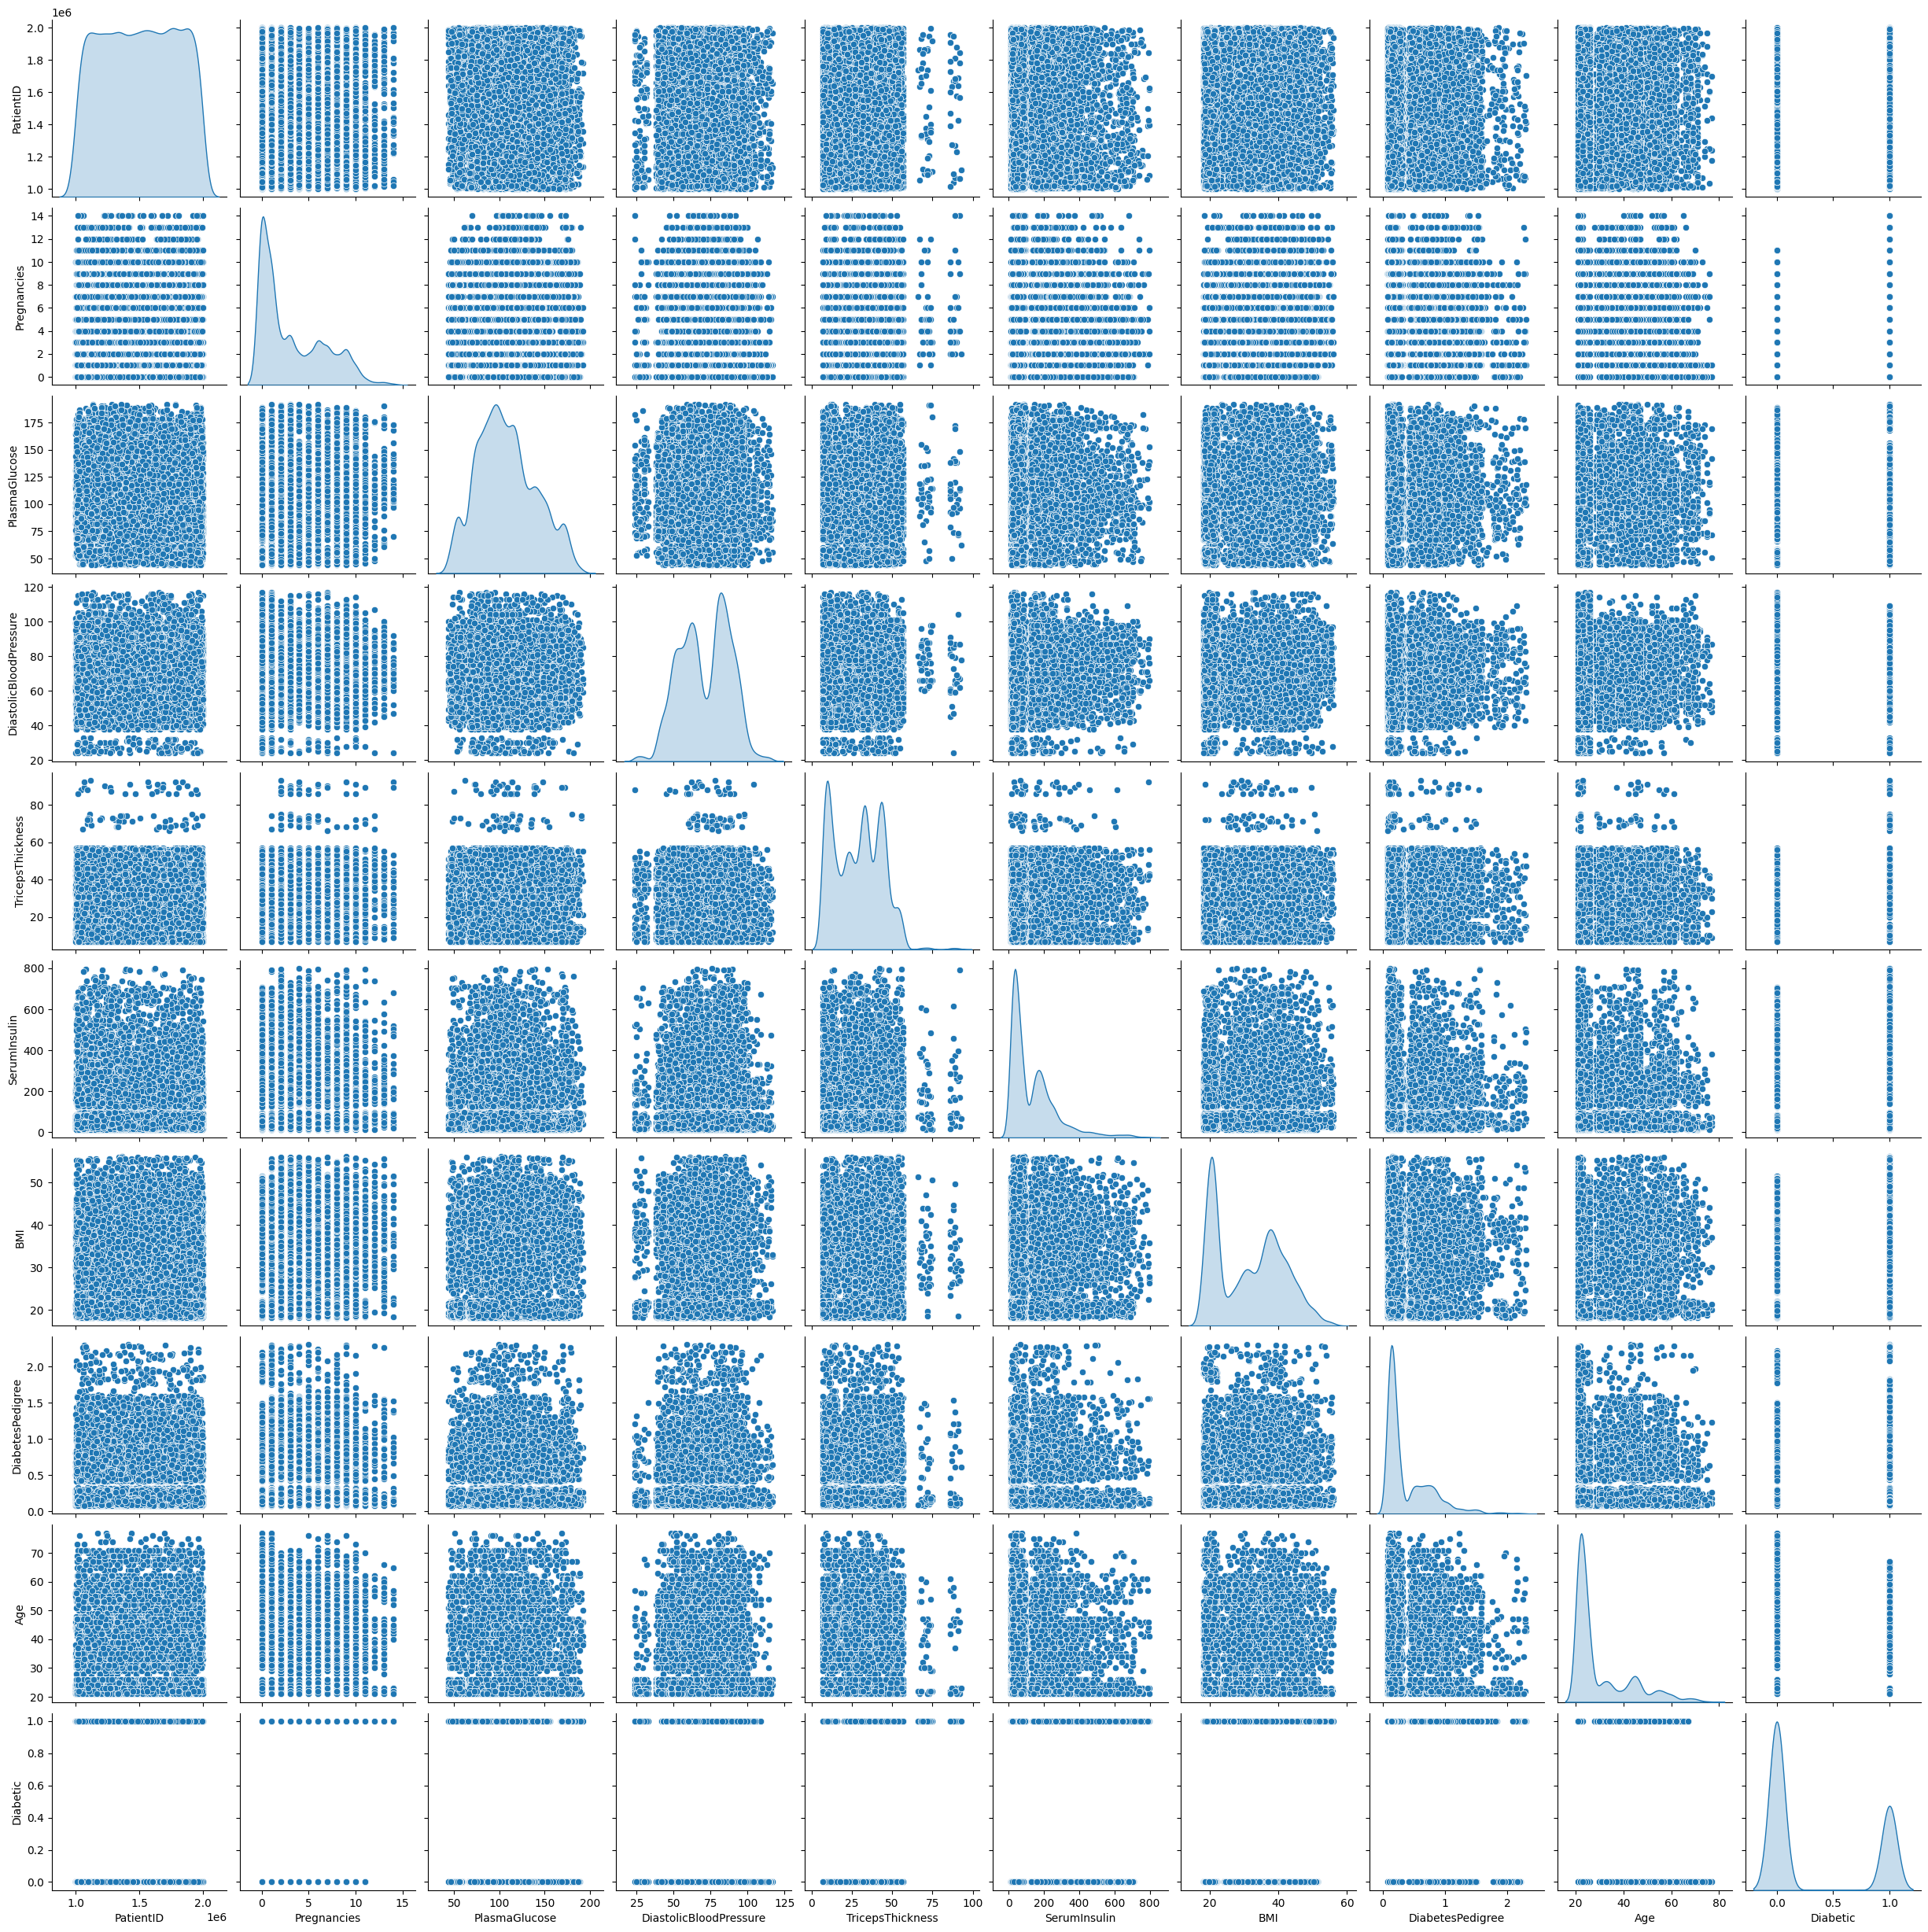

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Watching Relationships between features
sns.pairplot(diabetes, diag_kind='kde')
plt.show()

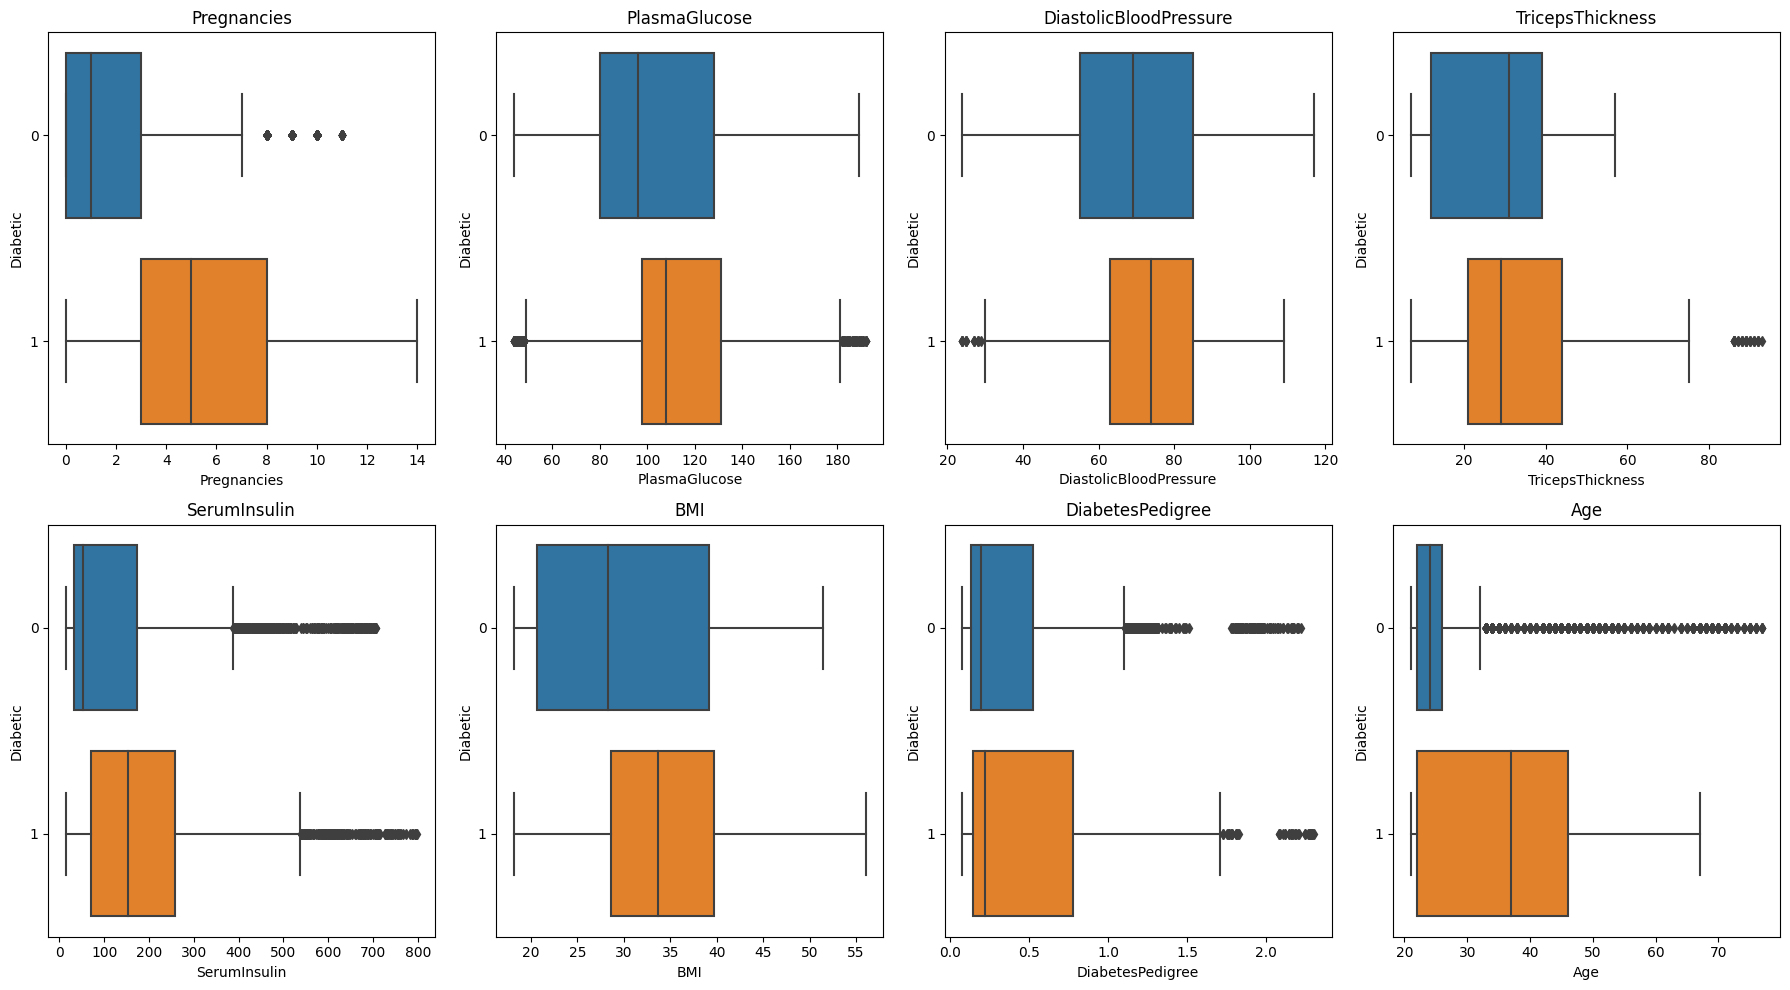

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
# Assuming you have a DataFrame named 'diabetes'
# and 'Diabetic' column contains the labels (0 for non-diabetic, 1 for diabetic)

features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and create horizontal boxplots
for i, col in enumerate(features):
    # Boxplot with horizontal orientation
    sns.boxplot(y='Diabetic', x=col, data=diabetes, ax=axes[i], orient='h')

    # Set title
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# OR
# features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
# for col in features:
#     diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
#     plt.title(col)
# plt.show()

# Finding best Parameter for Fitting Model

Best Hyperparameters: {'C': 1.0, 'penalty': 'l1'}


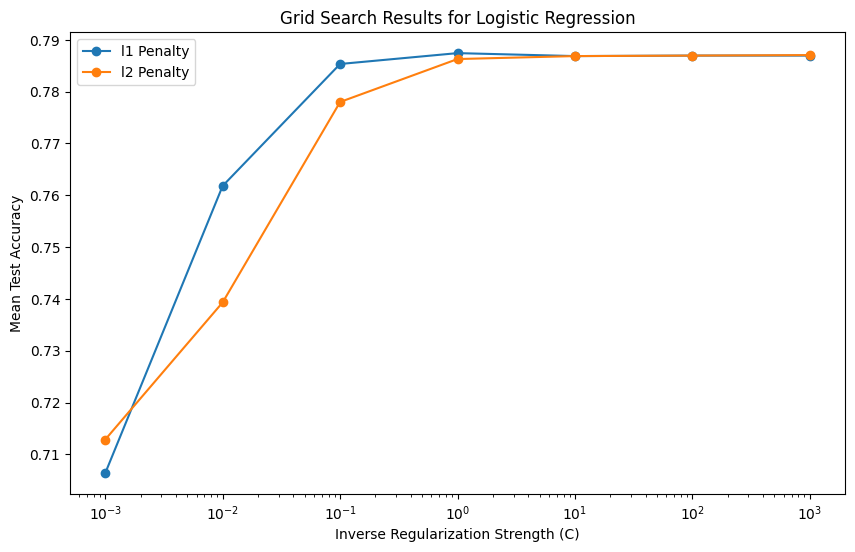

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Assuming X_train, y_train, X_test, y_test are your training and testing datasets

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Values of C from 0.001 to 1000 in a log scale
    'penalty': ['l1', 'l2'],      # Regularization types: l1 (Lasso) and l2 (Ridge)
}

# Create a logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Plot the results
results = grid_search.cv_results_
Cs = np.logspace(-3, 3, 7)
accuracy_l1 = results['mean_test_score'][::2]  # Accuracy values for l1 penalty
accuracy_l2 = results['mean_test_score'][1::2]  # Accuracy values for l2 penalty

plt.figure(figsize=(10, 6))
plt.plot(Cs, accuracy_l1, marker='o', label='l1 Penalty')
plt.plot(Cs, accuracy_l2, marker='o', label='l2 Penalty')
plt.xscale('log')
plt.xlabel('Inverse Regularization Strength (C)')
plt.ylabel('Mean Test Accuracy')
plt.title('Grid Search Results for Logistic Regression')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


# ttest_1samp

In [ ]:
from scipy.stats import ttest_1samp

# Example: One-Sample T-Test comparing mean of 'PlasmaGlucose' for Diabetic group to a hypothetical mean
hypothetical_mean = 100  # Replace with your value
statistic, p_value = ttest_1samp(diabetes[diabetes['Diabetic'] == 1]['PlasmaGlucose'], hypothetical_mean)

print(f"Statistic: {statistic}, p-value: {p_value}")


Statistic: 31.13201835128432, p-value: 1.2138886851359393e-194


# ttest_ind

In [ ]:
from scipy.stats import ttest_ind

# Example: Independent Samples T-Test comparing mean of 'PlasmaGlucose' for Diabetic vs. Non-Diabetic
statistic, p_value = ttest_ind(diabetes[diabetes['Diabetic'] == 1]['PlasmaGlucose'],
                                diabetes[diabetes['Diabetic'] == 0]['PlasmaGlucose'])

print(f"Statistic: {statistic}, p-value: {p_value}")


Statistic: 15.806177531442552, p-value: 7.958582016616854e-56


# mannwhitneyu

In [ ]:
from scipy.stats import mannwhitneyu

# Example: Mann-Whitney U Test comparing 'PlasmaGlucose' for Diabetic vs. Non-Diabetic
statistic, p_value = mannwhitneyu(diabetes[diabetes['Diabetic'] == 1]['PlasmaGlucose'],
                                   diabetes[diabetes['Diabetic'] == 0]['PlasmaGlucose'])

print(f"Statistic: {statistic}, p-value: {p_value}")


Statistic: 29429333.5, p-value: 3.0669399800179323e-70


# pearsonr

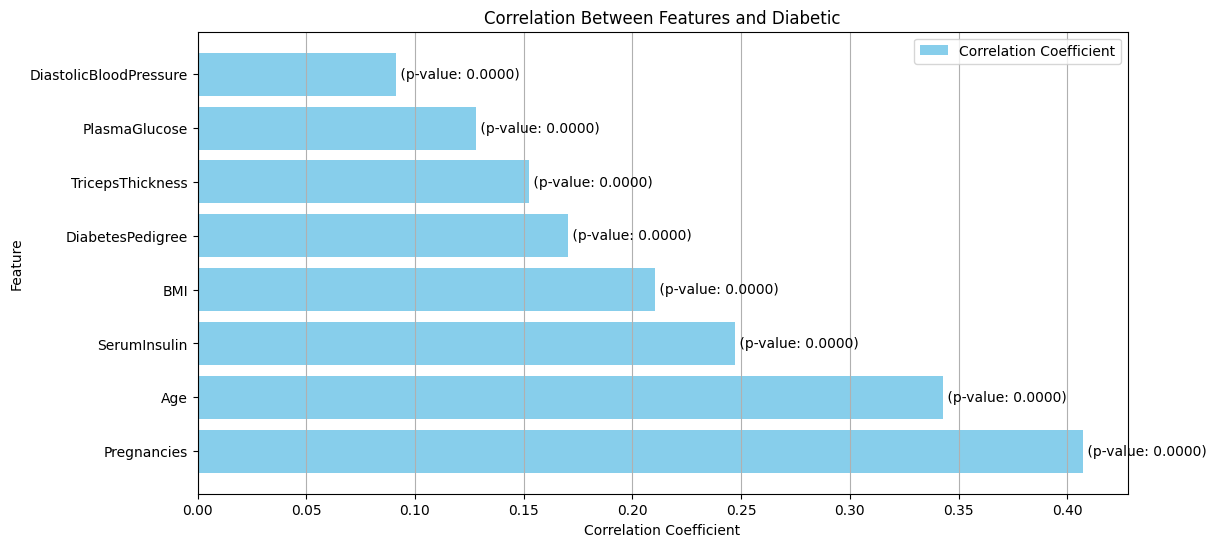

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming you have a DataFrame named 'diabetes'
# and 'Diabetic' column contains the labels (0 for non-diabetic, 1 for diabetic)

# Extract features and target variable
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target_variable = 'Diabetic'

# Create an empty DataFrame to store correlation coefficients and p-values
correlation_df = pd.DataFrame(columns=['Feature', 'Correlation', 'P-Value'])

# Calculate correlation coefficients and p-values
for feature in features:
    correlation, p_value = pearsonr(diabetes[feature], diabetes[target_variable])
  # correlation_df = correlation_df.append({'Feature': feature, 'Correlation': correlation, 'P-Value': p_value}, ignore_index=True)
    correlation_df = pd.concat([correlation_df, pd.DataFrame({'Feature': [feature], 'Correlation': [correlation], 'P-Value': [p_value]})], ignore_index=True)

# Sort the DataFrame by absolute correlation values
correlation_df = correlation_df.sort_values(by='Correlation', key=lambda x: abs(x), ascending=False)

# Plotting both Correlation Coefficient and P-Value
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting Correlation Coefficient
ax.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue', label='Correlation Coefficient')

# Adding P-Values as text annotations
for i, (corr, p_value) in enumerate(zip(correlation_df['Correlation'], correlation_df['P-Value'])):
    ax.text(corr, i, f' (p-value: {p_value:.4f})', va='center', fontsize=10)

ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Feature')
ax.set_title('Correlation Between Features and Diabetic')
ax.grid(axis='x')
ax.legend()
plt.show()


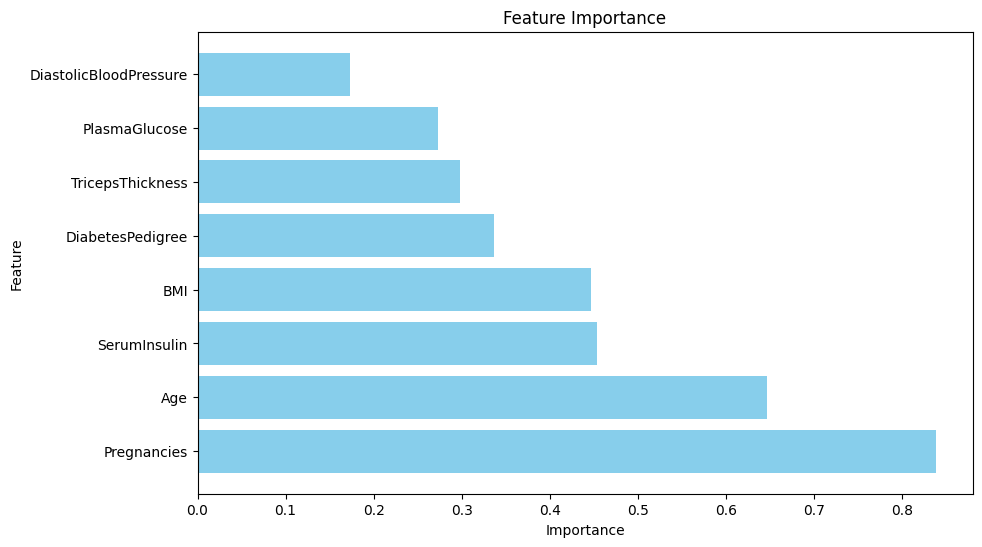

In [ ]:
# Feature Importance:

# Extract feature importance
feature_importance = best_logreg.coef_[0]

# Create DataFrame for feature names and importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# Interpretation:
## Null Hypothesis (H0): There is no significant difference between the groups.

## Alternative Hypothesis (H1): There is a significant difference between the groups.

### If the p-value is below your chosen significance level (commonly 0.05), you reject the null hypothesis, indicating a significant difference.

### If the p-value is above your significance level, you fail to reject the null hypothesis.

## Repeat these tests for each relevant feature. A low p-value suggests that the feature is likely associated with diabetes.

### Remember to adjust for multiple testing if you are conducting many tests simultaneously to control the family-wise error rate. Techniques like Bonferroni correction or False Discovery Rate (FDR) adjustment can be applied.

#**Now is Time to Check Accuracy and Performance of Our Model**
# by :  `Confusion Matrix و Precision, Recall, F1 Score و ROC Curve and AUC و Calibration Curve و Residual Analysis (Probabilistic Classifier)`

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7888888888888889


The accuracy is returned as a decimal value - a value of 1.0 would mean that the model got 100% of the predictions right, while an accuracy of 0.0 is, well, pretty useless!

## Summary

Here we prepared our data by splitting it into test and train datasets, and applied logistic regression - a way of applying binary labels to our data. Our model was able to predict whether patients had diabetes with what appears to be reasonable accuracy.

Confusion Matrix:
[[2635  351]
 [ 594  920]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2986
           1       0.72      0.61      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.75      0.75      4500
weighted avg       0.79      0.79      0.78      4500



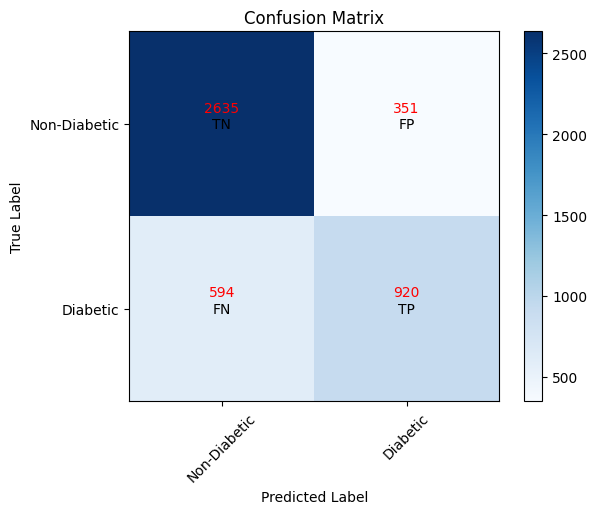

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_test)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions_test))

# Visualize Confusion Matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Non-Diabetic', 'Diabetic']
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
labels = [['TN', 'FP'], ['FN', 'TP']]

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j])+'\n\n', ha='center', va='center', color='red')
        plt.text(j, i, labels[i][j], ha='center', va='center', color='black')

plt.show()


#Here are some commonly used values for ha: in plt.text( ...,ha='center' ,va='center',...)

'center' (default): Center the text horizontally at the specified (x, y) coordinates.

'right': Align the right edge of the text with the (x, y) coordinates.

'left': Align the left edge of the text with the (x, y) coordinates.

'center_baseline': Center the text horizontally, but align the text's baseline with the (x, y) coordinates.

For vertical alignment (va), the commonly used values are:

'center' (default): Center the text vertically at the specified (x, y) coordinates.

'top': Align the top of the text with the (x, y) coordinates.

'bottom': Align the bottom of the text with the (x, y) coordinates.

'center_baseline': Center the text vertically, but align the text's baseline with the (x, y) coordinates.


# Precision, Recall, F1 Score:

In [ ]:
# Precision, Recall, F1 Score:

from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y_test, predictions_test)
print("Precision: {:.4f}".format(precision))

# Recall
recall = recall_score(y_test, predictions_test)
print("Recall: {:.4f}".format(recall))

# F1 Score
f1 = f1_score(y_test, predictions_test)
print("F1 Score: {:.4f}".format(f1))


Precision: 0.7237
Recall: 0.6037
F1 Score: 0.6583


# ROC Curve and AUC:

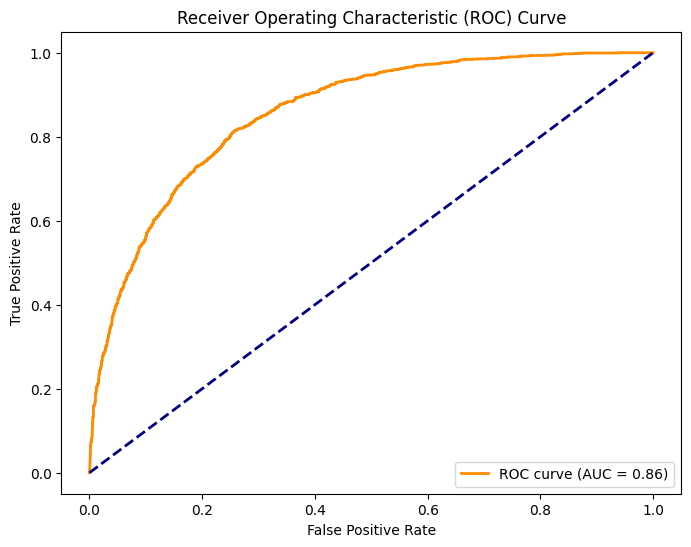

In [ ]:
# ROC Curve and AUC:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_logreg.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Calibration Curve:

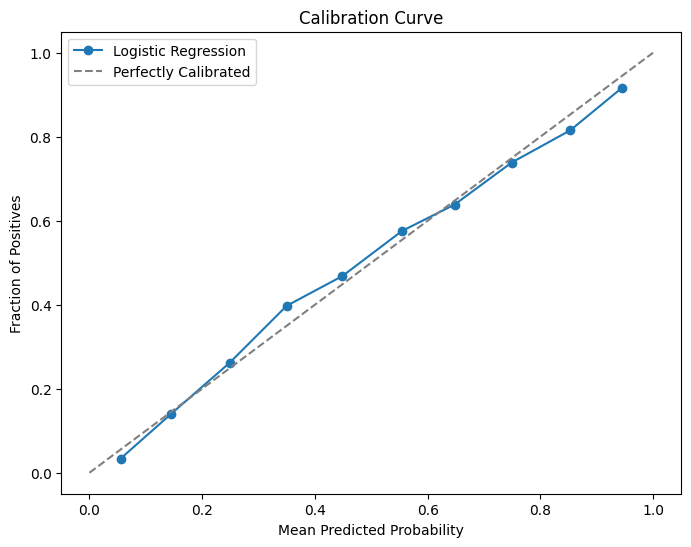

In [ ]:
# Calibration Curve:
from sklearn.calibration import calibration_curve

# Generate calibration curve
prob_true, prob_pred = calibration_curve(y_test, best_logreg.predict_proba(X_test)[:, 1], n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


# Residual Analysis (Probabilistic Classifier):

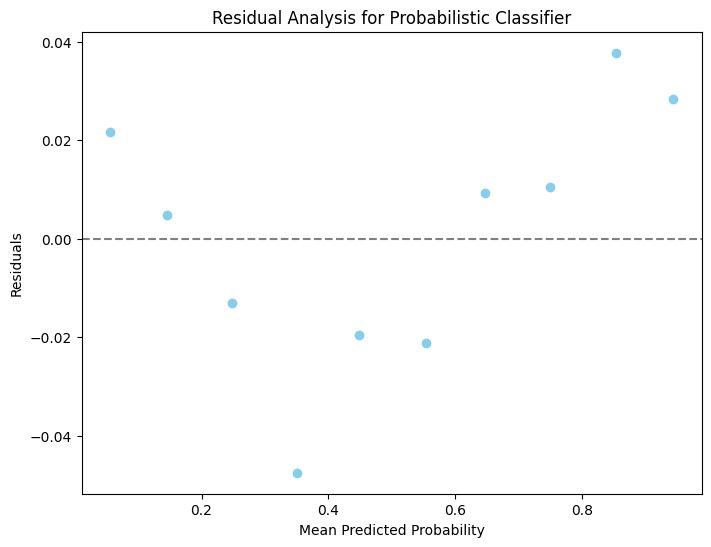

In [ ]:
# Residual Analysis (Probabilistic Classifier):
from sklearn.calibration import calibration_curve

# Residual Analysis for Probabilistic Classifier
prob_true, prob_pred = calibration_curve(y_test, best_logreg.predict_proba(X_test)[:, 1], n_bins=10)

# Calculate residuals
residuals = prob_pred - prob_true

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(prob_pred, residuals, marker='o', color='skyblue')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Probabilistic Classifier')
plt.show()


# Save Model as Job

In [ ]:
from joblib import dump, load

dump(best_logreg, '/content/drive/MyDrive/Logestic_Classifier_model.joblib')



['/content/drive/MyDrive/Logestic_Classifier_model.joblib']

# Use Model with New Data

In [ ]:
from joblib import dump, load

loaded_model = load('/content/drive/MyDrive/Logestic_Classifier_model.joblib')
new_data = np.array([[2, 120, 80, 25, 150, 25, 0.5, 30]])  # Example new data

# Make predictions on new data
new_predictions = loaded_model.predict(new_data)
print('Predicted label for new data: ', new_predictions)



Predicted label for new data:  [1]
